### 柱状图
Bar charts are useful for visualizing counts, or summary statistics with error bars. These examples show a few ways to do this with Matplotlib.

In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#### example 1:
- https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html

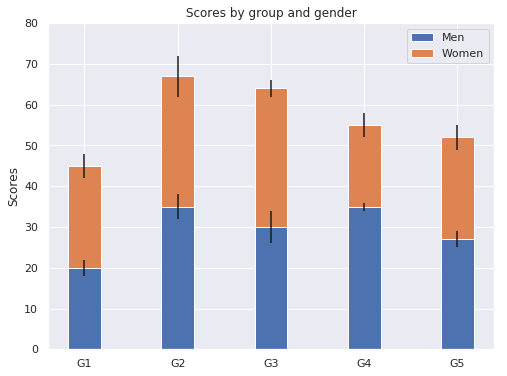

In [2]:
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

# bar(groups的位置，各组的值，柱的宽度，yerr表示std)
# 参数bottom用来定义放在下方的数据
plt.figure(figsize=(8, 6))
p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))  # 定义组名
plt.yticks(np.arange(0, 81, 10))  # y轴的刻度
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()

#### example 2
Bar charts of many shapes and sizes with Matplotlib.
- https://matplotlib.org/gallery/statistics/barchart_demo.html

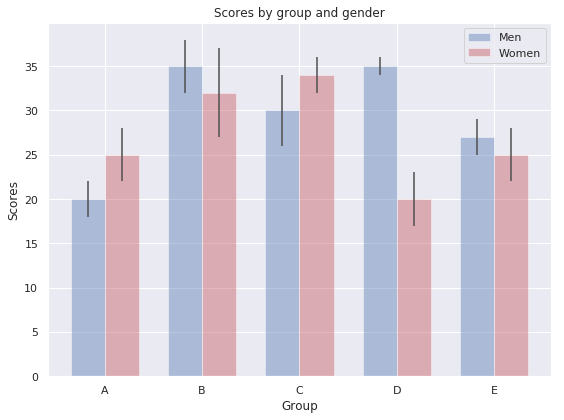

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots(figsize=(8, 6))  # 返回figure和axes的实例

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4  # 透明度
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config,
                label='Men')

# 同一组不同性别的数据，在x轴上右移bar_width
rects2 = ax.bar(index + bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index + bar_width / 2)  # x轴上每个间隔的位置
ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
ax.legend()

fig.tight_layout()
plt.show()

In [4]:
def plot_sgrna_num(total_count, before_remove_low, after_remove_low,
                   threshold, sublib_id, sgrna_per_gene, result_dir):
    """
    :param total_count: a list contains gene count, [0, 0, 0, 3, 14, 157, 691]
    :param before_remove_low:
    :param after_remove_low:
    :param threshold: 20 / 50
    :param sublib_id:
    :param sgrna_per_gene:
    :return:
    """
    labels = list(range(sgrna_per_gene + 1))

    x = np.linspace(0, 12, len(labels))  # the label locations
    width = 0.5  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    rects1 = ax.bar(x - width, total_count, width, label='designed gene')
    rects2 = ax.bar(x, before_remove_low, width, label='sequencing result')
    rects3 = ax.bar(x + width, after_remove_low, width, label='remove <= {} read counts'.format(threshold))

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('The number of gene')
    ax.set_title('The number of sgRNA per transcript sublib-{}'.format(sublib_id))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    # https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            if height != 0:
                ax.annotate('{}'.format(height),
                            xy=(rect.get_x() + rect.get_width() / 3, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    fig.tight_layout()

    plt.savefig(os.path.join(result_dir, 'sgRNA_per_gene_lib{}_remove_{}.png'.format(sublib_id, threshold)), dpi=300)

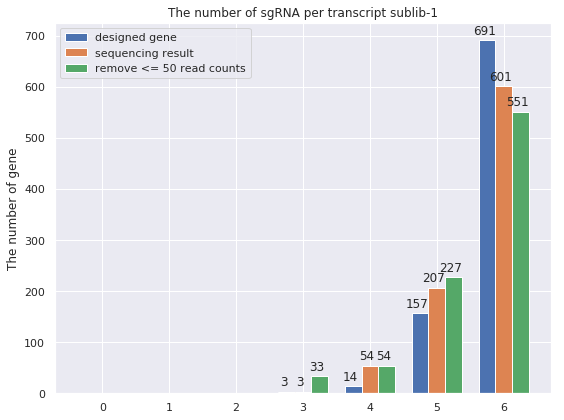

In [5]:
total_count = [0, 0, 0, 3, 14, 157, 691]
before_remove_low = [0, 0, 0, 3, 54, 207, 601]
after_remove_low = [0, 0, 0, 33, 54, 227, 551]
threshold, sublib_id, sgrna_per_gene = (50, 1, 6)
plot_sgrna_num(total_count=total_count, before_remove_low=before_remove_low, after_remove_low=after_remove_low, 
               threshold=threshold, sublib_id=sublib_id, sgrna_per_gene=sgrna_per_gene, result_dir='.')